In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
save_dir = (
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/last_minute_figures'
    '/topacio_tiles')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

df = pd.read_csv(
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/topacio_tiles/counts.csv'
)
percents = df.iloc[:, 2:].div(df['tile_count'], axis=0) * 100
percents.index = df['sample'].astype('str')

# sort samples by number of tiles affected by artifacts 
percents = percents.reindex(percents.sum(axis=1).sort_values().index)

print(f"Total tiles = {df['tile_count'].sum()*len(percents.columns)}")

tiles_w_artifacts = df.iloc[:, 2:].sum(axis=0).sum()
total_tiles = df['tile_count'].sum() * len(percents.columns)
print(
    f'Fraction of tiles with artifacts = {round((tiles_w_artifacts/total_tiles)*100, 2)}%'
)

Total tiles = 156300
Fraction of tiles with artifacts = 3.51%


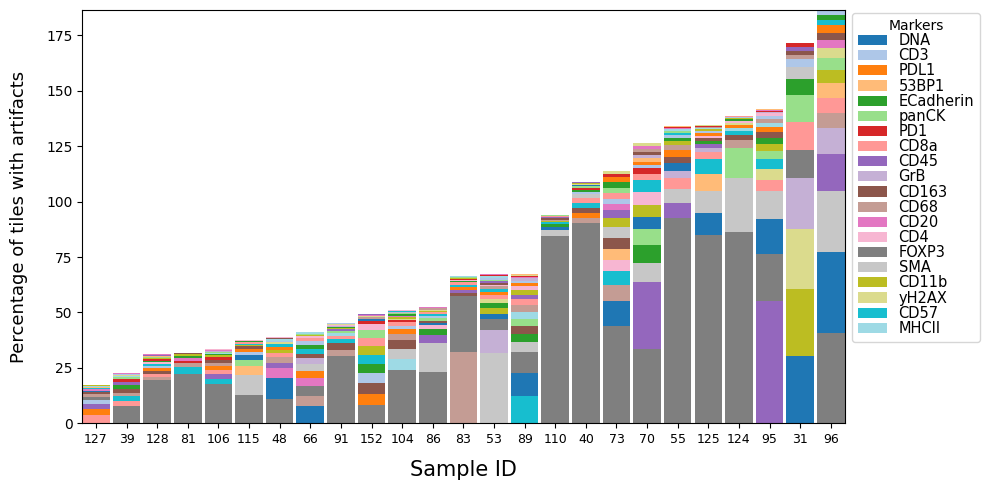

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

indexes = np.argsort(percents.values).T
heights = np.sort(percents.values).T
order = -1
bottoms = heights[::order].cumsum(axis=0)
bottoms = np.insert(bottoms, 0, np.zeros(len(bottoms[0])), axis=0)
cmap = plt.get_cmap('tab20')
cmap = [i for i in cmap.colors]
mpp_colors = dict(zip(percents.columns, cmap))

for btms, (idxs, vals) in enumerate(list(zip(indexes, heights))[::order]):
    mps = np.take(np.array(percents.columns), idxs)
    ax.bar(
        x=percents.index, height=vals, width=0.9, lw=0.0,
        bottom=bottoms[btms], color=[mpp_colors[m] for m in mps]
    )
ax.set_xlabel('Sample ID', size=15, labelpad=10)
ax.set_ylabel(
    'Percentage of tiles with artifacts', size=13,
    labelpad=13, c='k'
)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.margins(x=0)

markers = [
    Patch(facecolor=color, edgecolor=None) for color in mpp_colors.values()
]
plt.legend(
    markers, mpp_colors.keys(), title='Markers', prop={'size': 10.5},
    labelspacing=0.01, loc='upper left', bbox_to_anchor=(1.0, 1.01)
)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'topacio_tiles.pdf'))
plt.show()
plt.close('all')

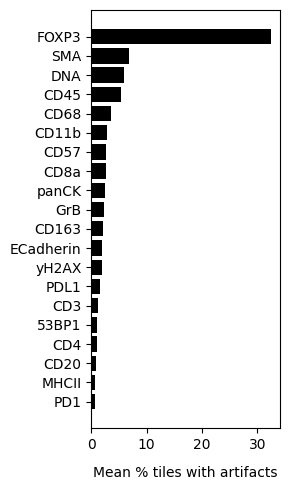

In [4]:
# mean percentage of tiles with artifacts per channel
fig, ax = plt.subplots(figsize=(3, 5))
bar_input = percents.mean().sort_values(ascending=True)
ax.barh(bar_input.index, bar_input, color='k')
ax.set_xlabel('Mean % tiles with artifacts', size=10, labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'topacio_bar.pdf'))
plt.show()
plt.close('all')